In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv', header = 0)

In [28]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,0


In [19]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x > 0.75 else 0)

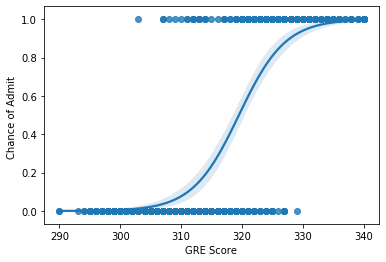

In [23]:
sns.regplot(y = 'Chance of Admit ', x = 'GRE Score', data = df, logistic = True)

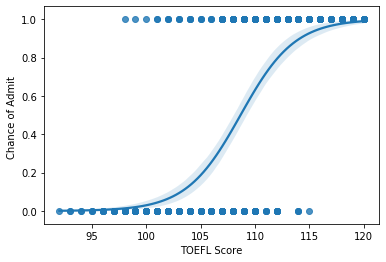

In [24]:
sns.regplot(y = 'Chance of Admit ', x = 'TOEFL Score', data = df, logistic = True)

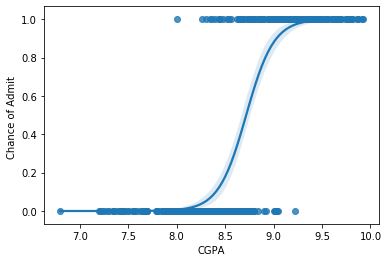

In [25]:
sns.regplot(y = 'Chance of Admit ', x = 'CGPA', data = df, logistic = True)

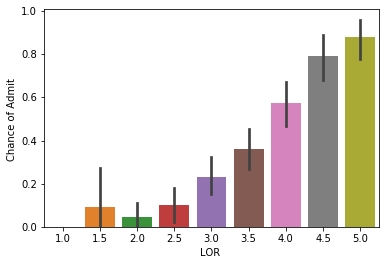

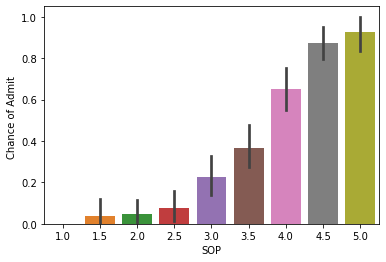

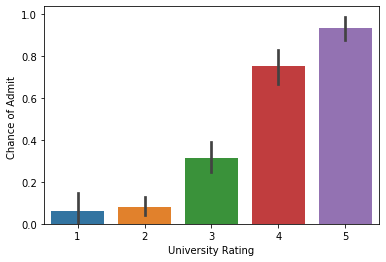

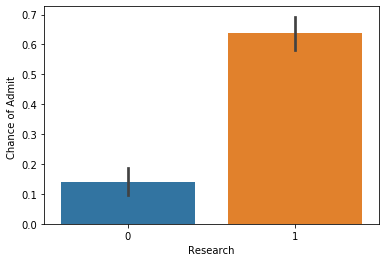

In [30]:
for i in ['LOR ', 'SOP', 'University Rating', 'Research']:
    sns.barplot(x = i, y = 'Chance of Admit ', data = df)
    plt.show()

In [31]:
X = df.drop(columns = ['Chance of Admit '])
Y = df['Chance of Admit ']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini')

dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
dtc.score(X_test,Y_test)

0.8466666666666667

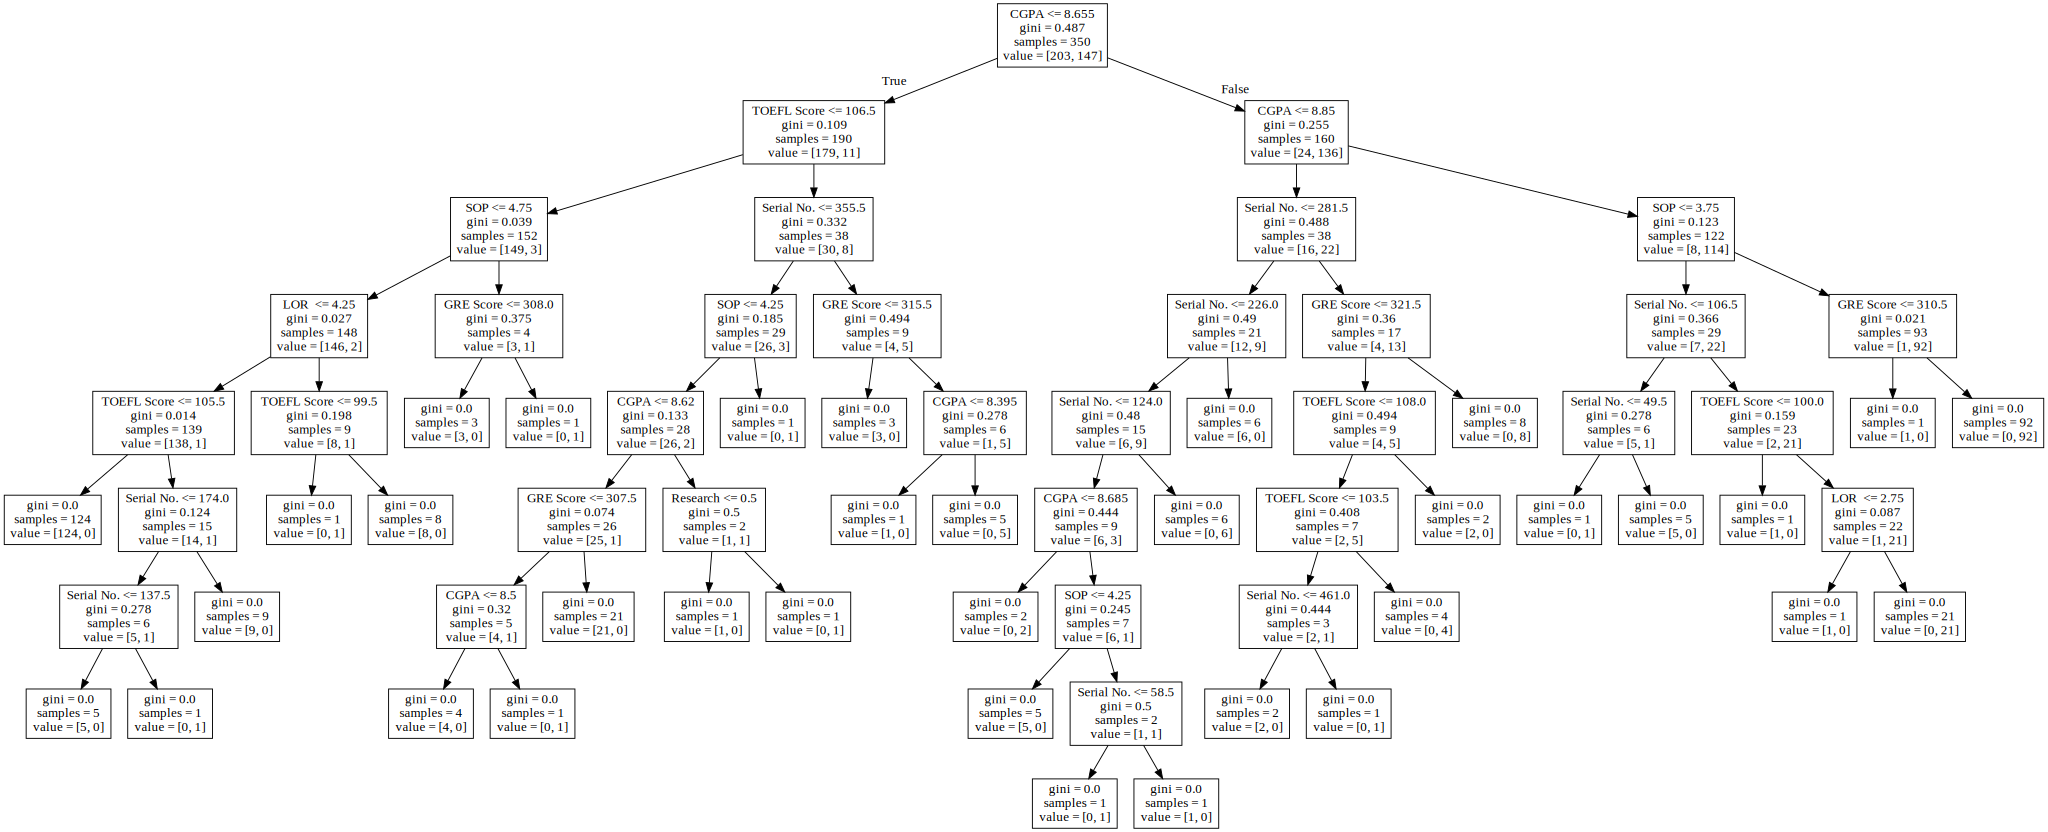

In [38]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,out_file=None, feature_names = X.columns)
graph = graphviz.Source(dot_data)
graph

In [52]:
feat = pd.DataFrame(data = dtc.feature_importances_, index = X.columns).sort_values(by = 0, ascending = False).T

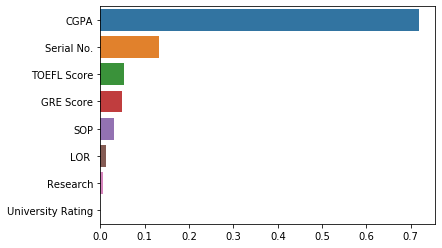

In [56]:
sns.barplot(data = feat, orient = 'h')

In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50)

rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
rfc.score(X_test, Y_test)

0.8933333333333333

In [90]:
rfc2 = RandomForestClassifier(n_estimators = 20)

rfc2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
rfc2.score(X_test, Y_test)

0.8866666666666667

In [92]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[1,5,10,100,1000], 'criterion' : ['gini', 'entropy']}

grid = GridSearchCV(rfc, params, n_jobs = -1, verbose = 2)

In [93]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              ran

In [94]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [95]:
grid.score(X_test, Y_test)

0.8866666666666667

In [96]:
grid.best_score_

0.9

In [97]:
rfc3 = RandomForestClassifier(n_estimators = 100)

rfc3.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
rfc3.feature_importances_

array([0.0725857 , 0.21903232, 0.14626394, 0.07303826, 0.09983872,
       0.07115909, 0.28908823, 0.02899374])

In [99]:
feat3 = pd.DataFrame(data = rfc3.feature_importances_, index = X.columns).sort_values(by = 0, ascending = False).T

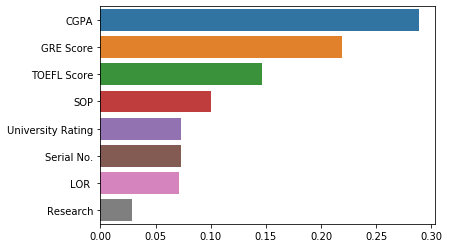

In [100]:
sns.barplot(data = feat3, orient = 'h')